# Assignment 7: Xarray Fundamentals with Atmospheric Radiation Data

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg" width=65%>

_Public domain, by NASA, from Wikimedia Commons_


A pre-downloaded and subsetted a portion of the CERES dataset is available here: http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It may take a few minutes to download.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr

plt.rcParams["figure.figsize"] = (12, 6)

Next, download the NetCDF file using pooch.

In [2]:
import pooch
fname = pooch.retrieve(
    'http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc',
    known_hash='a876cc7106e7dcb1344fbec5dcd7510e5cd947e62049a8cbc188ad05ffe00345'
)
print(fname)

/home/jovyan/.cache/pooch/8e18cca34f0b893a1829cf86ad4b7c49-CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc


## 1) Opening data and examining metadata

### 1.1) Open the dataset and display its contents 


In [3]:
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. 

In [4]:
for x in list(ds.keys()):
    print(f"{x : <27}{':' : ^3}{ds[x].attrs['long_name'] : >10}")

toa_sw_all_mon              : Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon              : Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon             : Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon              : Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon              : Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon             : Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon              : Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon              : Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon             : Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon                   : Incoming Solar Flux, Monthly Means
cldarea_total_daynig

## 2) Basic reductions, arithmetic, and plotting

### 2.1) Calculate the time-mean of the entire dataset

In [5]:
ds.mean(dim='time')

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 122.3 122.3 ... 104.4 104.4
    toa_lw_all_mon               (lat, lon) float32 141.1 141.1 ... 194.1 194.1
    toa_net_all_mon              (lat, lon) float32 -91.29 -91.29 ... -126.3
    toa_sw_clr_mon               (lat, lon) float32 119.9 119.9 ... 89.47 89.47
    toa_lw_clr_mon               (lat, lon) float32 140.2 140.2 ... 200.4 200.4
    toa_net_clr_mon              (lat, lon) float32 -88.03 -88.03 ... -117.6
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 -3.253 -3.251 ... -8.651
    solar_mon                    (lat, lon) float32 172.1 172.1 ... 172.3 172.3
    cldarea_total_daynight_mon   (lat, lon) float32 51.52 51.52 ... 78.93 78.93
    cldpress_total_daynight_mon  (lat, lon) float32 486.5 486.5 ... 766.9 766.9
    cldtemp_total_daynight_mon   (lat, lon) float32 225.2 225.2 ... 247.9 247.9
    cldtau_total_day_mon         (lat, lon) float32 4.158 4.158 ... 4.821 4.821

### 2.2) From this, make a 2D plot of the the time-mean Top of Atmosphere Longwave, Shortwave, and Incoming Solar Radiation
(Use "All-Sky" conditions)

Note the sign conventions on each variable.

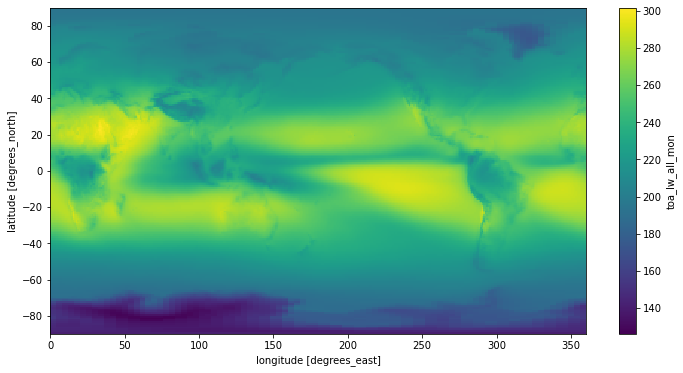

In [6]:
ds.toa_lw_all_mon.mean(dim='time').plot(); # +: outgoing lw from earth

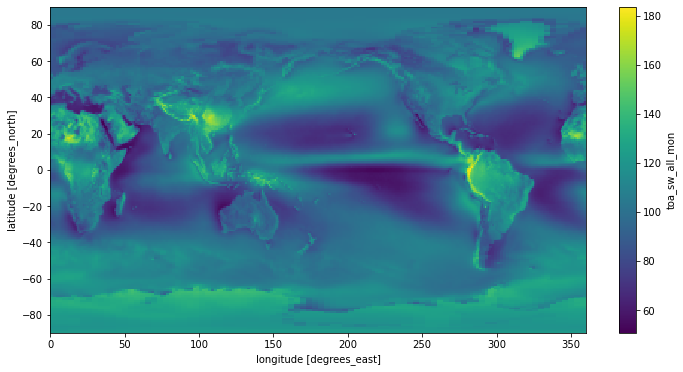

In [7]:
ds.toa_sw_all_mon.mean(dim='time').plot(); # +: outgoing sw from earth

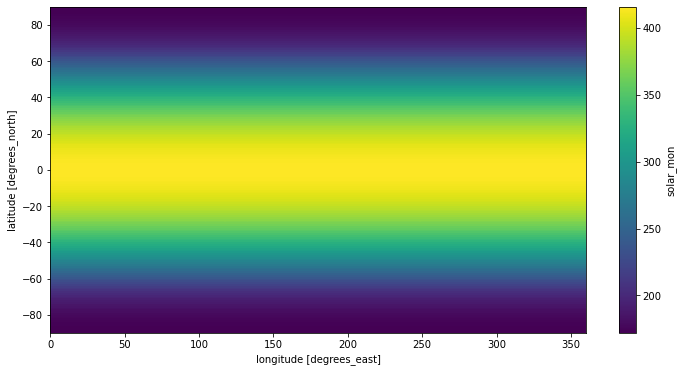

In [8]:
ds.solar_mon.mean(dim='time').plot(); # +: incoming solar radiation to the earth

### 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions for each variable in order to get this to work.

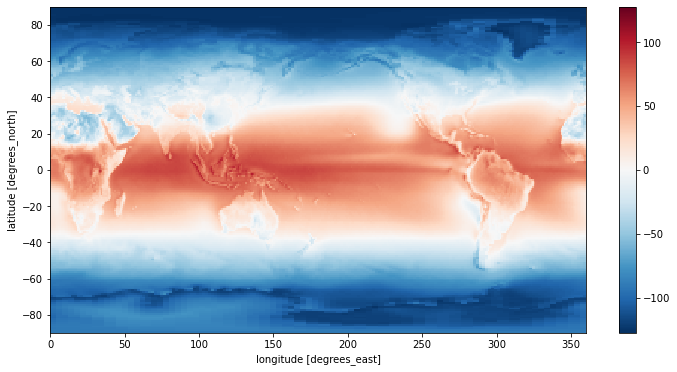

In [9]:
(-ds.toa_sw_all_mon.mean(dim='time')-ds.toa_lw_all_mon.mean(dim='time')+ds.solar_mon.mean(dim='time')).plot();

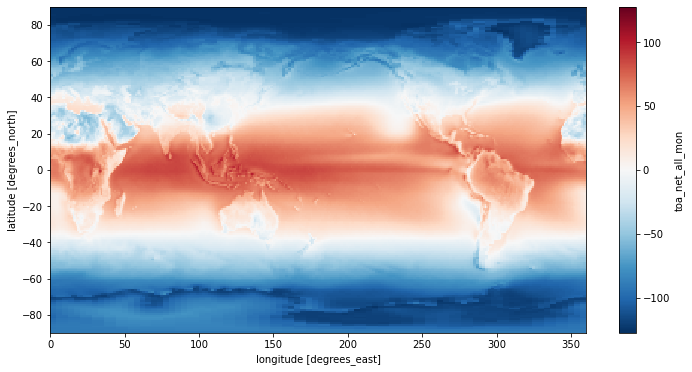

In [10]:
ds.toa_net_all_mon.mean(dim='time').plot();

## 3) Mean and weighted mean

### 3.1) Calculate the global (unweighted) mean of TOA net radiation

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [11]:
ds.toa_net_all_mon.mean()

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729034, dtype=float32)

The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

### 3.2) Create a `weight` array proportional to $\cos(\lambda)$

Think carefully a about radians vs. degrees


In [12]:
weight = np.cos(np.deg2rad(ds.lat))

### 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Use xarray's [weighted array reductions](http://xarray.pydata.org/en/stable/user-guide/computation.html#weighted-array-reductions) to compute the weighted mean.

In [13]:
ds.toa_net_all_mon.weighted(weights=weight).mean()

<xarray.DataArray 'toa_net_all_mon' ()>
array(0.87808518)

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimated to be. Do you think our calculation is precise enough to detect this? 

#### __My Answer__: 
One of article on the NASA website says
_"The exact amount of the energy imbalance is very hard to measure, but it appears to be a little over 0.8 watts per square meter."_
(https://earthobservatory.nasa.gov/features/EnergyBalance)

This calculation is quite precise.

### 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [14]:
ds.solar_mon.weighted(weights=weight).mean() #340.4

<xarray.DataArray 'solar_mon' ()>
array(340.28326598)

In [15]:
ds.toa_lw_all_mon.weighted(weights=weight).mean() #239.9

<xarray.DataArray 'toa_lw_all_mon' ()>
array(240.26691846)

In [16]:
ds.toa_sw_all_mon.weighted(weights=weight).mean() #99.9

<xarray.DataArray 'toa_sw_all_mon' ()>
array(99.13806041)

## 4) Meridional Heat Transport Calculation

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

### 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere ... it's just a homework problem).

In [17]:
R = 6371000 # in meter

dA = (R**2) * np.cos(np.deg2rad(ds.lat)) * np.deg2rad(xr.ones_like(ds.lat)) * np.deg2rad(xr.ones_like(ds.lon))
dA.sum()

<xarray.DataArray ()>
array(5.10070942e+14)

In [18]:
import math
Earth_true_surface = 4*math.pi*(R**2)
print(Earth_true_surface, "m^2")

510064471909788.25 m^2


Multiplying the pixel area (m$^2$) from above with the radiative flux (W m$^{-2}$) gives you the total amount of radiation absorbed in each pixel in W.

### 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

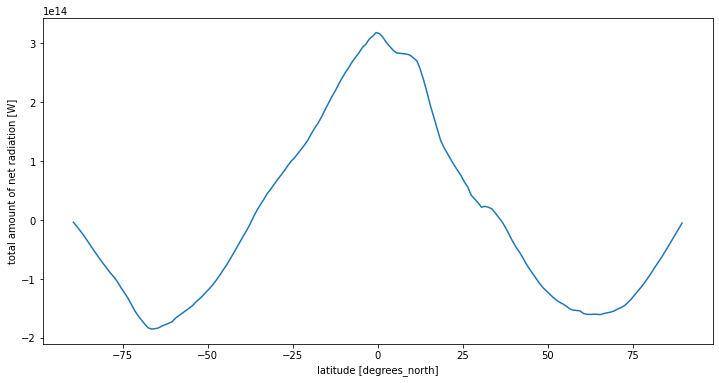

In [19]:
ds_net_per_lat = (ds.toa_net_all_mon * dA).mean('time').sum('lon')
ds_net_per_lat.plot()
plt.ylabel('total amount of net radiation [W]');

### 4.3) Plot the cumulatuve sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

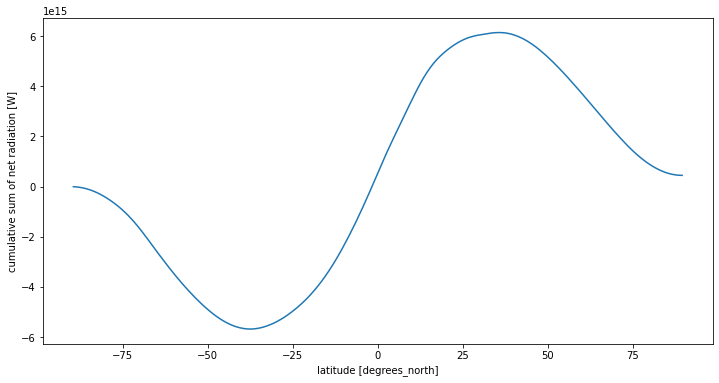

In [20]:
ds_net_per_lat.cumsum(dim='lat').plot()
plt.ylabel('cumulative sum of net radiation [W]');

You should get a curve that looks something like this: http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.html

## 5) Selecting and Merging Data

For the next problem, use the following approximate locations of four different cities.

| city | lon | lat |
| -- | -- | -- |
| NYC |74 W | 40 N | 
| Nome, Alaska | 165 W | 64 N | 
| Columbo, Sri Lanka | 80 E | 7 N |
| Hobart, Tasmania | 147 E | 43 S |


### 5.1) Create a `Dataset` for each point from the global dataset

In [21]:
ds_NYC = ds.isel(lon=286, lat=40) # Latitude cannot be indexed.
ds_Nome = ds.isel(lon=195, lat=64)
ds_Columbo = ds.isel(lon=80, lat=7)
ds_Hobart = ds.isel(lon=147,lat=-43)

In [22]:
ds_Hobart

<xarray.Dataset>
Dimensions:                      (time: 203)
Coordinates:
    lon                          float32 147.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          float32 47.5
Data variables: (12/14)
    toa_sw_all_mon               (time) float32 145.6 162.2 ... 49.56 52.07
    toa_lw_all_mon               (time) float32 203.2 204.5 ... 199.8 204.6
    toa_net_all_mon              (time) float32 -66.62 11.75 ... -143.5 -131.9
    toa_sw_clr_mon               (time) float32 76.54 84.03 ... 24.24 32.06
    toa_lw_clr_mon               (time) float32 221.0 228.7 ... 235.4 229.8
    toa_net_clr_mon              (time) float32 -15.38 65.68 ... -153.8 -137.1
    ...                           ...
    toa_cre_net_mon              (time) float32 -51.23 -53.94 ... 10.3 5.191
    solar_mon                    (time) float32 282.2 378.4 ... 105.9 124.7
    cldarea_total_daynight_mon   (time) float32 79.77 82.05 ... 93.97 86.39
    cldpress_total_daynight_mon  (time) float32 745.9 688.5 ... 679.6 712.2
    cldtemp_total_daynight_mon   (time) float32 253.1 253.1 ... 249.0 250.2
    cldtau_total_day_mon         (time) float32 4.014 5.826 ... 6.606 3.987
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 5.2) Merge these four datasets into a new dataset with the new dimension `city`

Create a new dimension coordinate to hold the city name.
Display the merged dataset.

In [23]:
ds_city = xr.concat([ds_NYC, ds_Nome, ds_Columbo, ds_Hobart], dim = 'city')
ds_city

<xarray.Dataset>
Dimensions:                      (city: 4, time: 203)
Coordinates:
    lon                          (city) float32 286.5 195.5 80.5 147.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          (city) float32 -49.5 -25.5 -82.5 47.5
Dimensions without coordinates: city
Data variables: (12/14)
    toa_sw_all_mon               (city, time) float32 139.3 87.39 ... 52.07
    toa_lw_all_mon               (city, time) float32 211.0 210.9 ... 204.6
    toa_net_all_mon              (city, time) float32 -52.9 -107.1 ... -131.9
    toa_sw_clr_mon               (city, time) float32 47.07 48.27 ... 32.06
    toa_lw_clr_mon               (city, time) float32 265.1 257.0 ... 229.8
    toa_net_clr_mon              (city, time) float32 -14.77 -114.1 ... -137.1
    ...                           ...
    toa_cre_net_mon              (city, time) float32 -38.13 6.965 ... 5.191
    solar_mon                    (city, time) float32 297.4 191.2 ... 124.7
    cldarea_total_daynight_mon   (city, time) float32 75.73 66.66 ... 86.39
    cldpress_total_daynight_mon  (city, time) float32 496.4 499.4 ... 712.2
    cldtemp_total_daynight_mon   (city, time) float32 247.5 246.6 ... 250.2
    cldtau_total_day_mon         (city, time) float32 8.99 8.208 ... 6.606 3.987
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 5.3) Plot the incoming solar and net radiation at each city

Make two separate plots.
Try to have your legend created automatically from the data.

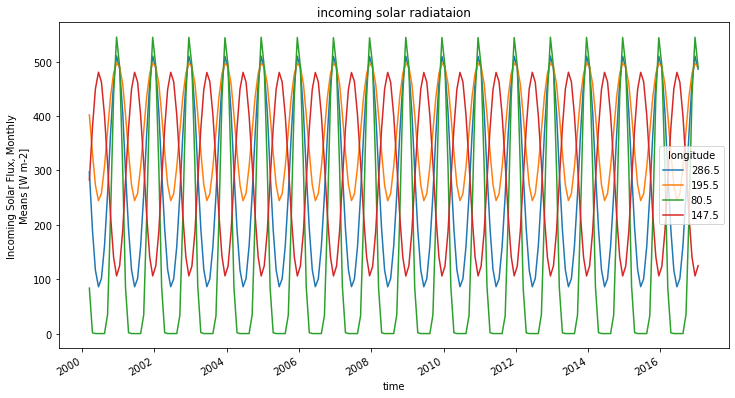

In [24]:
fig = plt.figure(figsize = (12, 6))
for i in range(4):
    ds_city.solar_mon[i, :].plot()
plt.legend(ds_city.lon.values, title='longitude')
plt.title("incoming solar radiataion");

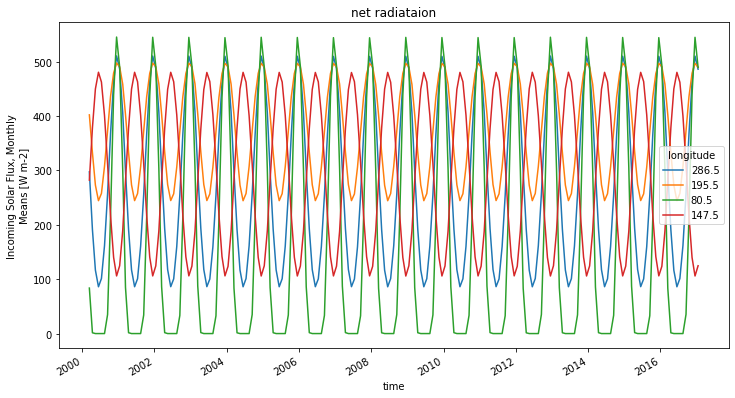

In [25]:
fig = plt.figure(figsize = (12, 6))
for i in range(4):
    ds_city.solar_mon[i, :].plot()
plt.legend(ds_city.lon.values, title='longitude')
plt.title("net radiataion");